In [122]:
import numpy as np # Linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt 
import seaborn as sns

In [123]:
df = pd.read_csv('Social_Network_Ads.csv')

In [124]:
df.sample(5)

,Age,EstimatedSalary,Purchased
209,46,22000,0
204,58,101000,1
48,30,135000,1
5,27,58000,0
187,33,41000,0


In [125]:
df.shape

(400, 3)

# Train test split

In [126]:
from sklearn. model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn what is the mean and standard deviation of the actual data
scaler.fit(X_train)

StandardScaler()

In [130]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [131]:
# transform train and test sets based on the mean and SD of the train data using the formula
X_train_scaled = scaler. transform(X_train)
X_test_scaled = scaler. transform(X_test)

In [132]:
# Standard scaler takes pd df as input but returns np array so converting np array to pd df again
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [133]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [134]:
# Statistics of original df
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [135]:
# Statistics of scaled df
np.round(X_train_scaled. describe(), 1)

# The mean of both features is 0 and the SD of both features is 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

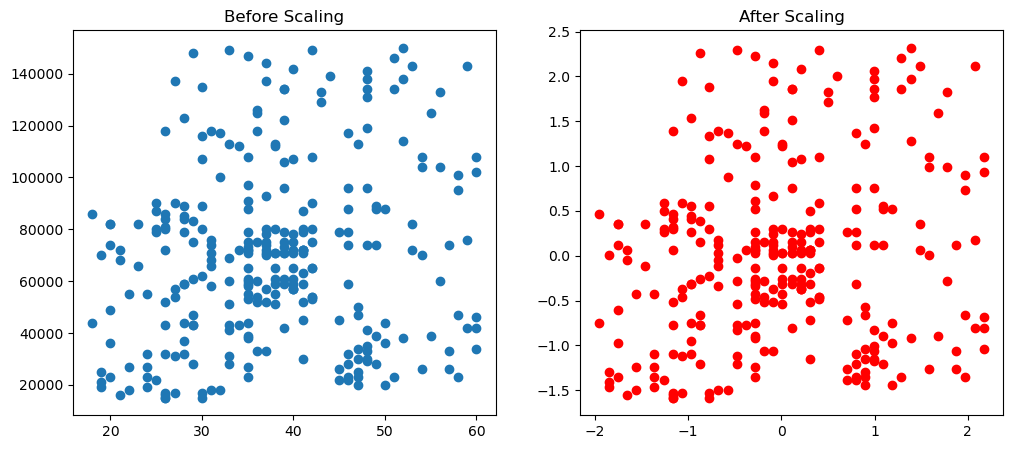

In [136]:
fig, (ax1, ax2) = plt. subplots(ncols=2, figsize= (12, 5))
ax1.scatter(X_train['Age'], X_train[ 'EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter (X_train_scaled[ 'Age'], X_train_scaled[ 'EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

# Before scaling the mean of the data is somewhere near the point (40, 80000) but after scaling 
# it has changed to (0,0) so basically the mean is centered and the data is restricted by SD without 
# changing the actual shape of the data.

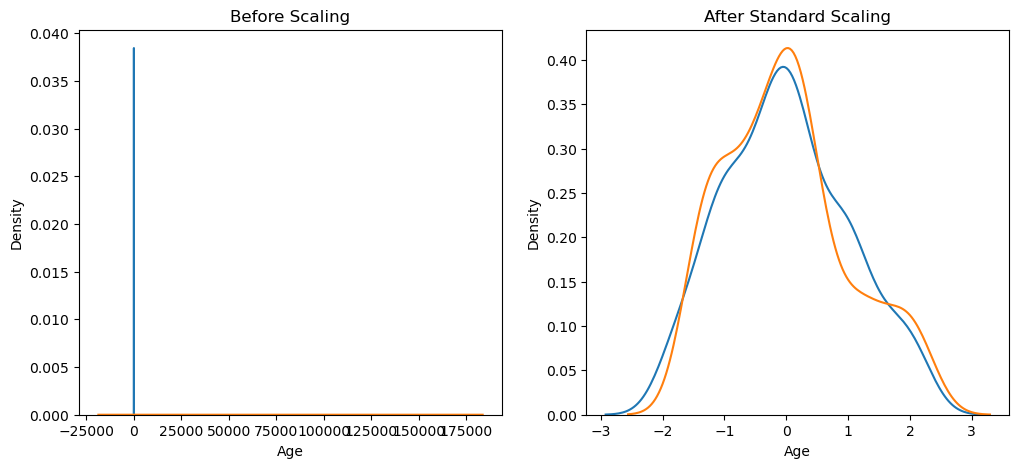

In [137]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title( 'Before Scaling')
sns.kdeplot(X_train[ 'Age'], ax=ax1)
sns. kdeplot(X_train[ 'EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title( 'After Standard Scaling') 
sns. kdeplot(X_train_scaled[ 'Age'], ax=ax2)
sns. kdeplot(X_train_scaled[ 'EstimatedSalary'], ax=ax2)
plt. show()

# Below is the Probability density function for both the features, in the first graph since the scales
# of both the features are spread in opposite direction they are not comparable whereas after scaling 
# both the features have similar scales so they are more comparable and now the algorithm will have
# better performance

# Effect of scaling on individual features

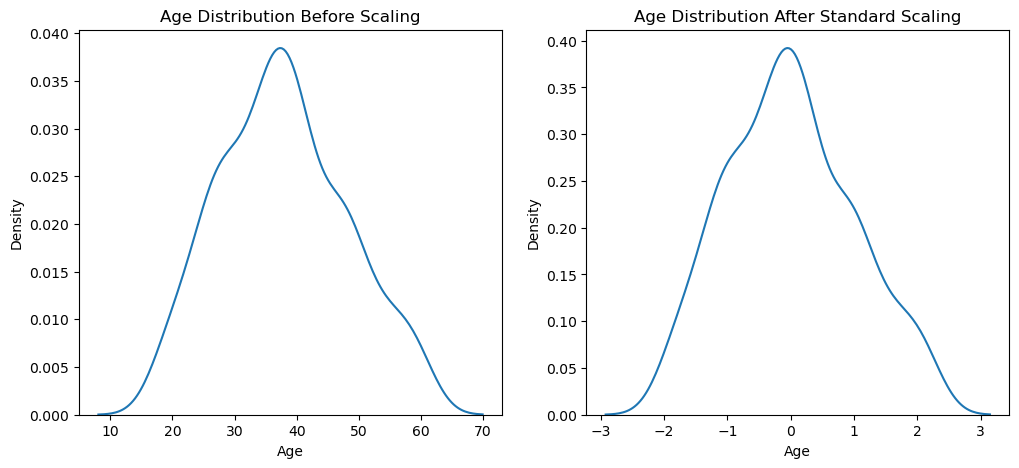

In [138]:
# NOTE: The standard deviation of the features remain the same only their scales change after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling') 
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling') 
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

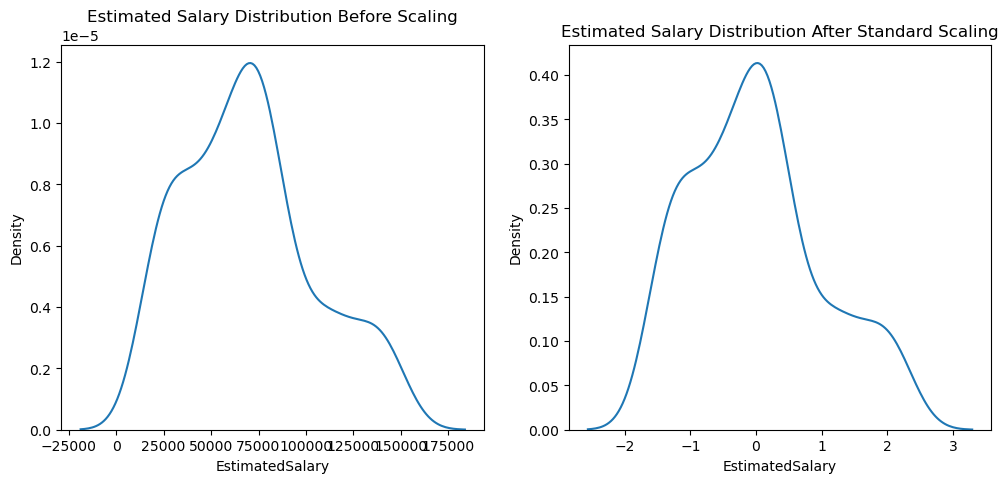

In [139]:
# NOTE: The standard deviation of the features remain the same only their scales change after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Estimated Salary Distribution Before Scaling') 
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Estimated Salary Distribution After Standard Scaling') 
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [140]:
from sklearn. linear_model import LogisticRegression

In [141]:
# Two objects of LogisticRegression are created to check performance on scaled and unscaled data
lr = LogisticRegression()
lr_scaled = LogisticRegression ()

In [142]:
# Both are trained on the respective data
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [143]:
# Both are tested on the respective data
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [144]:
from sklearn. metrics import accuracy_score

In [145]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


# Effect of Outliers

In [146]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)

In [149]:
df.shape

(403, 3)

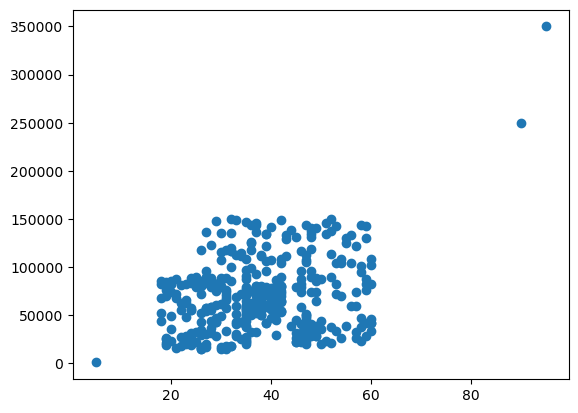

In [147]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
df[ 'Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [153]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train. columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

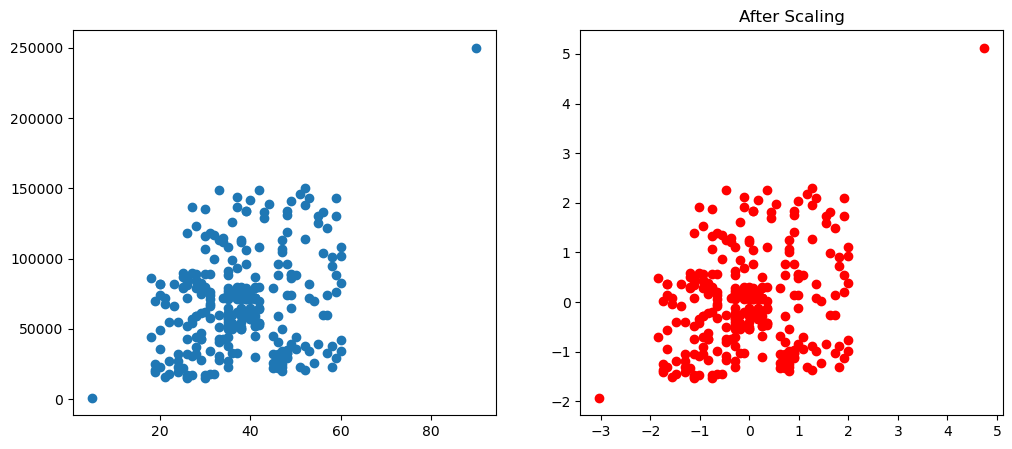

In [154]:
# Outliers need to be handled explicitly as outliers behave as outliers even after scaling only their scale changes
fig, (axl, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
axl.scatter(X_train[ 'Age'], X_train[ 'EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[ 'Age'], X_train_scaled[ 'EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()